# **Fish weight prediction**

## Name: Gupta Bhandari
## Student id: co899873

In [59]:
# import all libraries and dependencies for dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [60]:
# Reading the Fish CSV file
df_fish = pd.read_csv('/content/Fish.csv')

In [61]:
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [62]:
df_fish.shape

(159, 7)

In [63]:
# Information of the data set
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [64]:
# description of the data
df_fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [65]:
# Checking the null values
df_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no null value in fish dataset.

In [66]:
# checking for duplicates
df_fish.duplicated().sum()

0

There are no any duplicate values in the dataset

# Visualization of The Data

In [67]:
# Counting the all 7 fish  individually in the data set
df_fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Visualizing the different fish names available

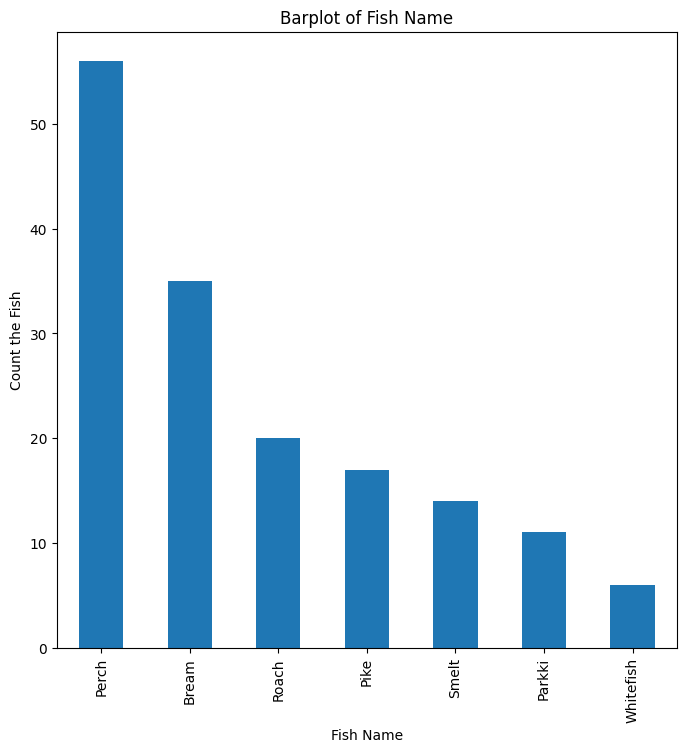

In [68]:
plt.figure(figsize = (8, 8))
ax = df_fish['Species'].value_counts().plot(kind = 'bar', stacked=True)
plt.title('Barplot of Fish Name')
plt.xlabel('Fish Name')
plt.ylabel('Count the Fish')
plt.show()

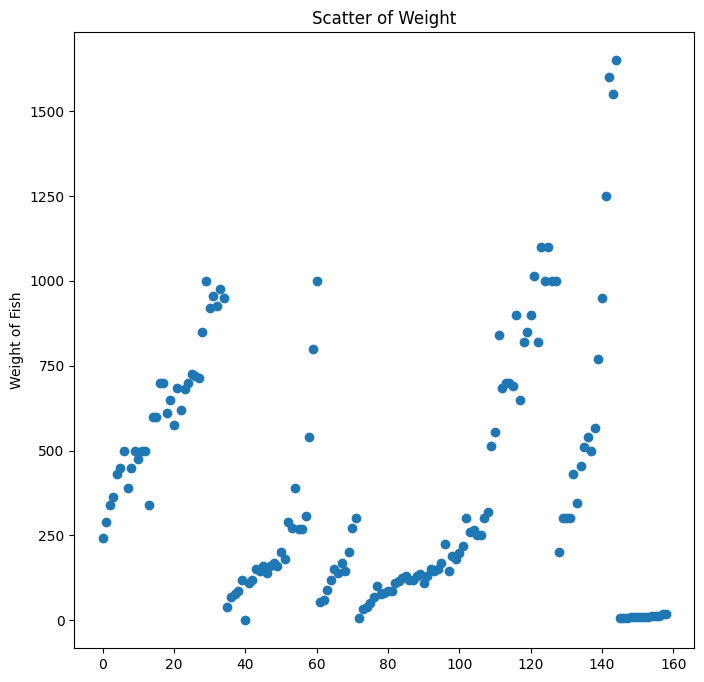

In [69]:
# Scatter plot of weight variable
plt.figure(figsize = (8, 8))
plt.scatter(x = np.arange(len(df_fish)), y = df_fish['Weight'])
plt.title('Scatter of Weight')
plt.ylabel('Weight of Fish')
plt.show()

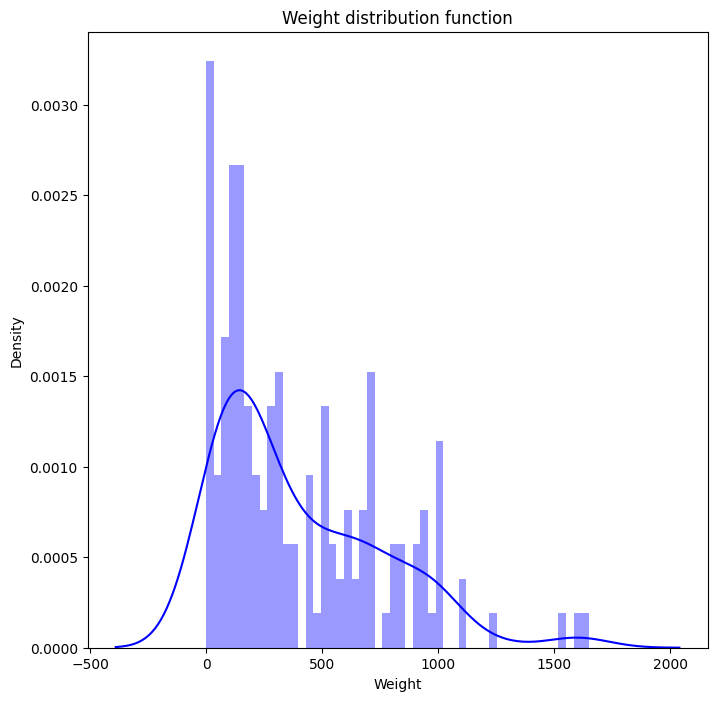

In [70]:
# distribution plot of weight variable
plt.figure(figsize=(8,8))
sns.distplot(df_fish['Weight'], bins=50, kde=True, color = 'blue')
plt.title('Weight distribution function')
plt.show()

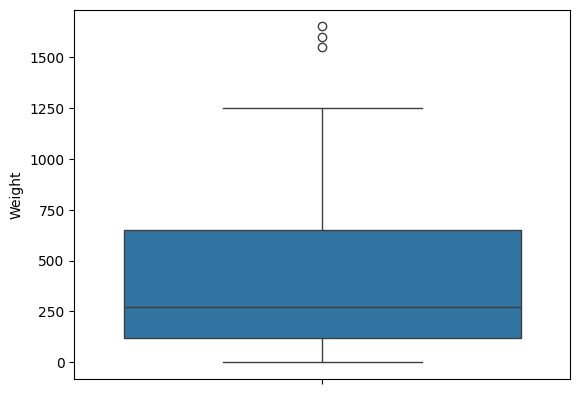

In [71]:
# Boxplot of weight varible
sns.boxplot(y = 'Weight', data = df_fish)
plt.show()

<Figure size 1500x1500 with 0 Axes>

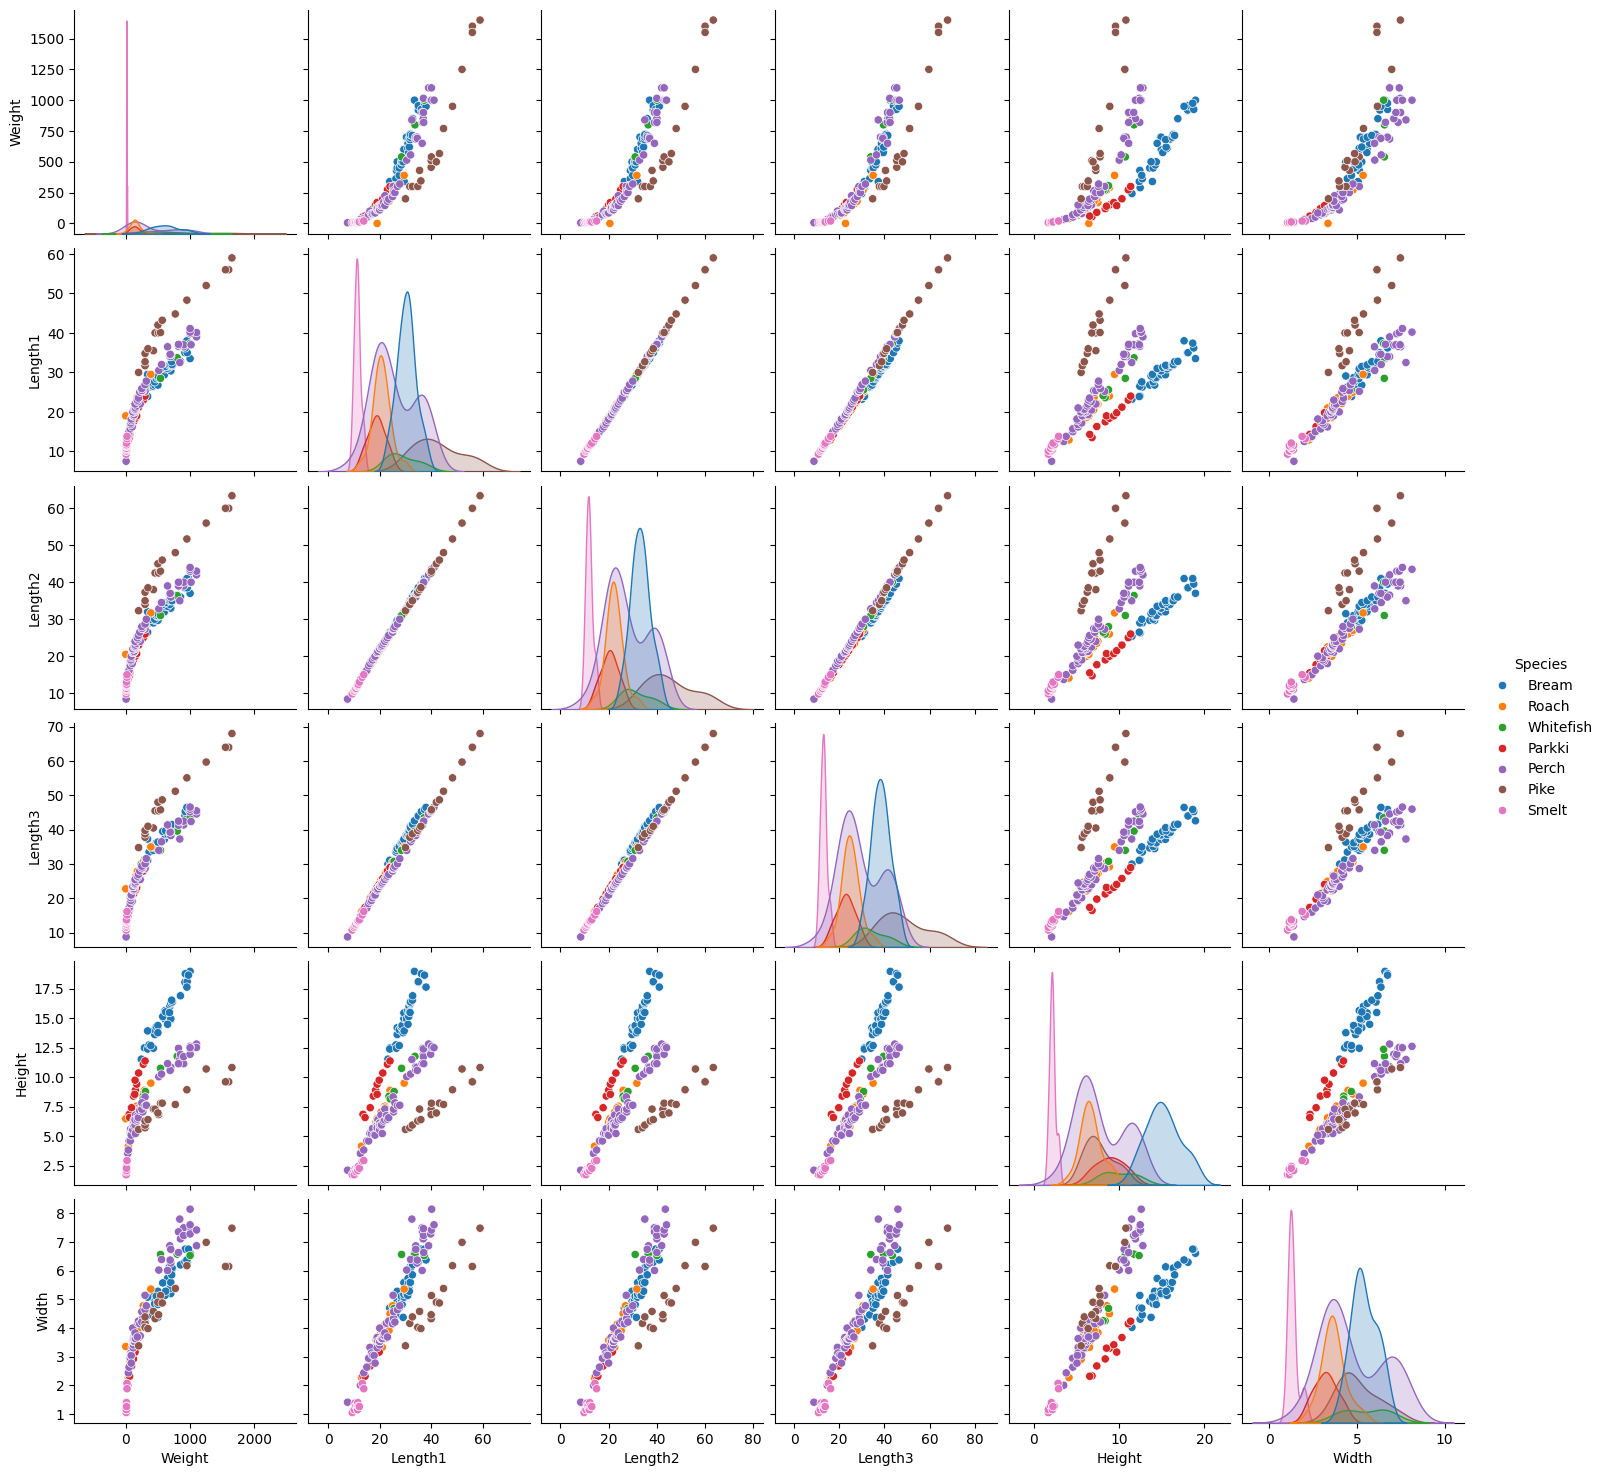

In [72]:
# Pairplot of dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_fish, hue="Species")
plt.show()

<Figure size 1000x600 with 0 Axes>

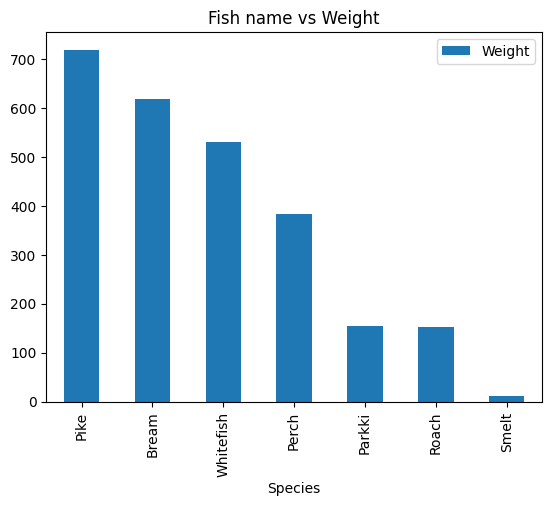

In [73]:
# The bar plot of fish and their corresponding mean weight
plt.figure(figsize=(10, 6))
df_fishx = pd.DataFrame(df_fish.groupby(['Species'])['Weight'].mean().sort_values(ascending = False))
df_fishx.plot.bar()
plt.title('Fish name vs Weight')
plt.show()

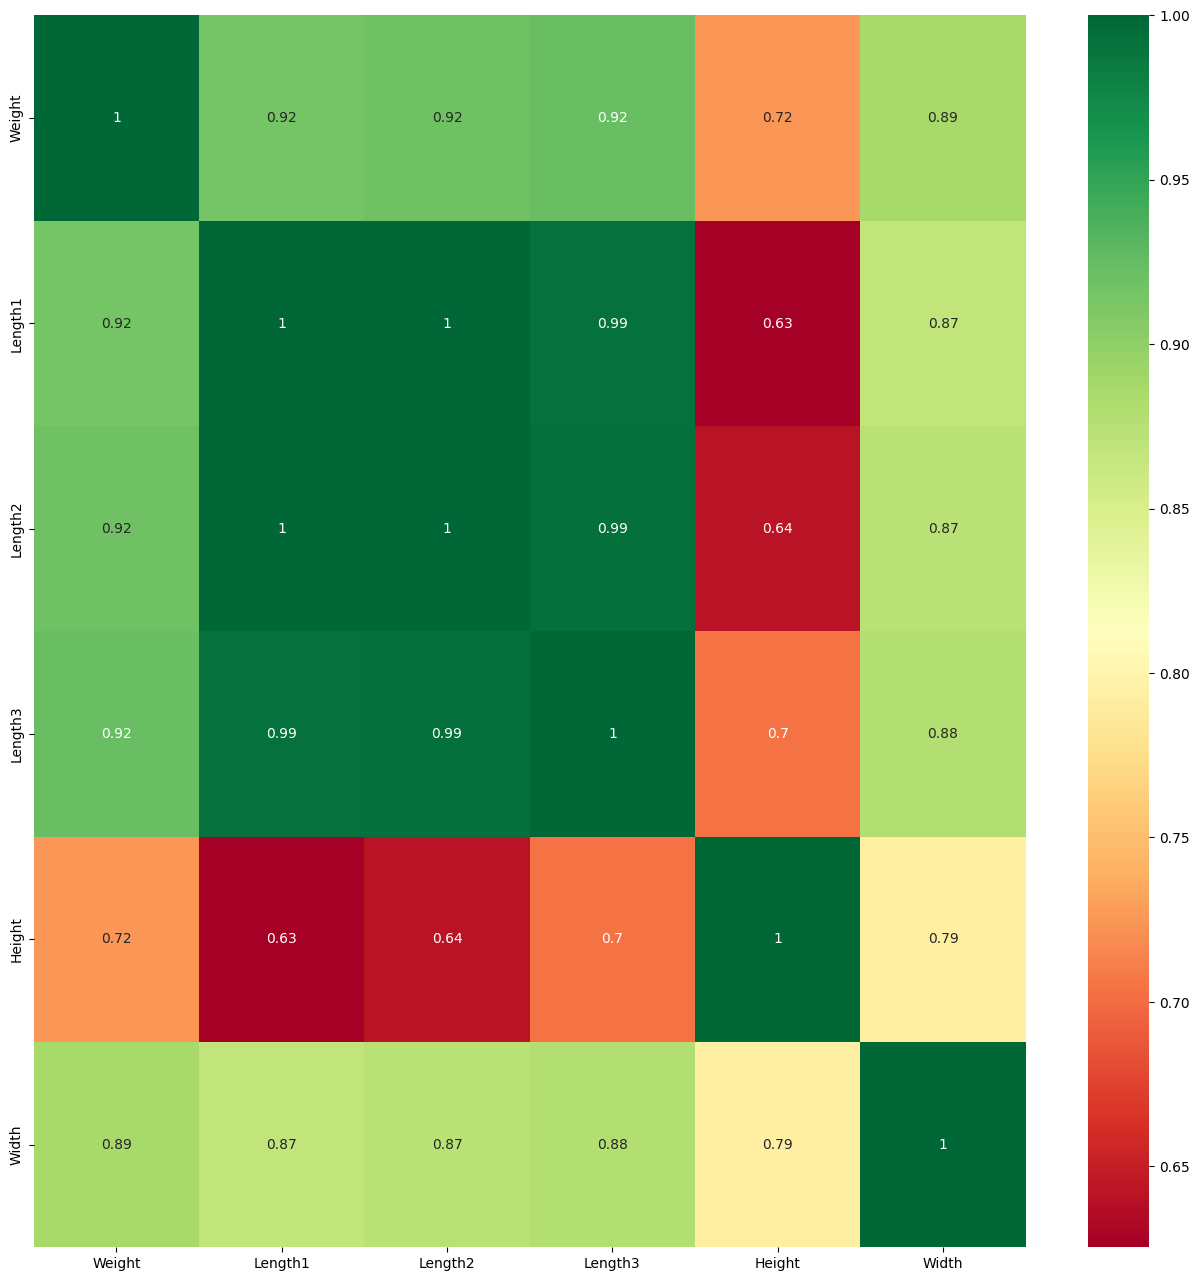

In [74]:
# Heat map of the data set
plt.figure(figsize = (16, 16))
sns.heatmap(df_fish.corr(), cmap="RdYlGn", annot=True)
plt.show()

# Data Preprocessing

### Encoding

In [75]:
#Encoding 'Species' column using One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder()
x = df_fish[['Species']]

encoded_species = my_encoder.fit_transform(x).toarray()
encoded_species

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [76]:
df_fish[['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']] = encoded_species  #Here we should encode in alphabetical order
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Dropping Species column
df_fish.drop('Species', axis=1, inplace=True)
df_fish

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Standardization

In [78]:
# standardization of the data set

num_cols = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
df_fish_standard = df_fish[num_cols]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_fish_standard)
scaled_data

array([[-3.05788578e-01, -2.82303007e-01, -1.06020232e-01,
         5.96578670e-01, -2.36528948e-01],
       [-2.25507242e-01, -1.98053663e-01, -2.33668373e-03,
         8.21260549e-01, -6.65789457e-02],
       [-2.35542409e-01, -1.79331587e-01, -1.09769794e-02,
         7.97341291e-01,  1.65793169e-01],
       [ 5.30159764e-03,  5.46943678e-02,  1.96390116e-01,
         8.79771455e-01,  2.26210031e-02],
       [ 2.53719316e-02,  5.46943678e-02,  2.39591594e-01,
         8.12834979e-01,  4.26371272e-01],
       [ 5.54774324e-02,  1.20221635e-01,  3.00073664e-01,
         1.08395111e+00,  3.03431249e-01],
       [ 5.54774324e-02,  1.20221635e-01,  2.82793073e-01,
         1.21901769e+00,  5.12357880e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.25994551e-01,
         8.65728838e-01,  1.62163285e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.34634847e-01,
         1.17815367e+00,  2.53683979e-01],
       [ 2.26075271e-01,  2.13832017e-01,  4.29678099e-01,
         1.23004114e+00

In [79]:
scaled_features = pd.DataFrame(data=scaled_data, columns=num_cols) #Dataframe of scaled numerical columns
scaled_features

,Length1,Length2,Length3,Height,Width
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


In [80]:
# Drop the numerical colums before scaling
modified_df_fish = df_fish.drop(num_cols, axis = 1)
modified_df_fish

,Weight,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
154,12.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,13.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,12.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,19.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# Concatinate the scaled features
final_df_fish = pd.concat([scaled_features, modified_df_fish], axis=1)
final_df_fish

,Length1,Length2,Length3,Height,Width,Weight,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,242.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,340.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005302,0.054694,0.196390,0.879771,0.022621,363.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.025372,0.054694,0.239592,0.812835,0.426371,430.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,12.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,13.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,12.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,19.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
# check for null values
final_df_fish.isna().sum()

Length1      0
Length2      0
Length3      0
Height       0
Width        0
Weight       0
Bream        0
Parkki       0
Perch        0
Pike         0
Roach        0
Smelt        0
Whitefish    0
dtype: int64

In [83]:
final_df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Length1    159 non-null    float64
 1   Length2    159 non-null    float64
 2   Length3    159 non-null    float64
 3   Height     159 non-null    float64
 4   Width      159 non-null    float64
 5   Weight     159 non-null    float64
 6   Bream      159 non-null    float64
 7   Parkki     159 non-null    float64
 8   Perch      159 non-null    float64
 9   Pike       159 non-null    float64
 10  Roach      159 non-null    float64
 11  Smelt      159 non-null    float64
 12  Whitefish  159 non-null    float64
dtypes: float64(13)
memory usage: 16.3 KB


# Model Building

In [84]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
l_rg = LinearRegression()

In [85]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = final_df_fish.drop('Weight', axis=1)
y = final_df_fish['Weight']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
l_rg.fit(X_train, y_train)

LinearRegression()

## Model Testing

In [86]:
l_rg.predict(X_test)

array([  18.73825424,   11.88642049,  187.71128095,  332.73989462,
        212.09701648,  757.76161609,  -61.14301932,  255.77252524,
        260.49479187, 1148.32283034,  600.42812967,  852.95666864,
        541.6348983 ,  140.05796526,  680.96324928,  818.78498332,
       1009.77141718,  289.70475993,  226.06716705,  585.13887424,
        -11.02265194,  585.70704112,  509.58219989,  492.02110639,
        814.27086551,  964.09005079,  219.24045431,  356.93819832,
        -90.40664262,  -11.87462241,  575.80799591,  -18.41252664])

# Model Evaluation

R²: 0.950735248005451
MSE: 7007.383189853979


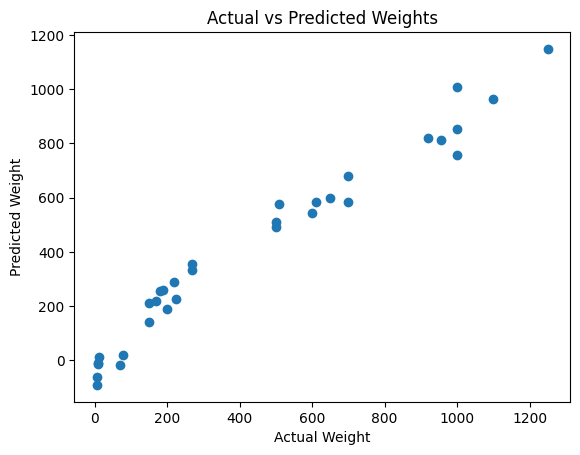

In [88]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluation
r2 = r2_score(y_test, l_rg.predict(X_test))
mse = mean_squared_error(y_test, l_rg.predict(X_test))
print(f'R²: {r2}')
print(f'MSE: {mse}')

# Visualization
plt.scatter(y_test, l_rg.predict(X_test))
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weights')
plt.show()